In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_path = Path("../data/processed/processed_data.csv")
accident_dfs = pd.read_csv(data_path)



## Total fatal crashes and total fatalities across all 4 years!!

In [3]:
# print(accident_dfs.columns)
# print(accident_dfs[["FATALS","ST_CASE"]])
total_fatalities = accident_dfs["FATALS"].value_counts().sum()
print("Total_fatalities:",total_fatalities)

Total_fatalities: 152796


## The TOP 10 states have the most fatal crashes!!

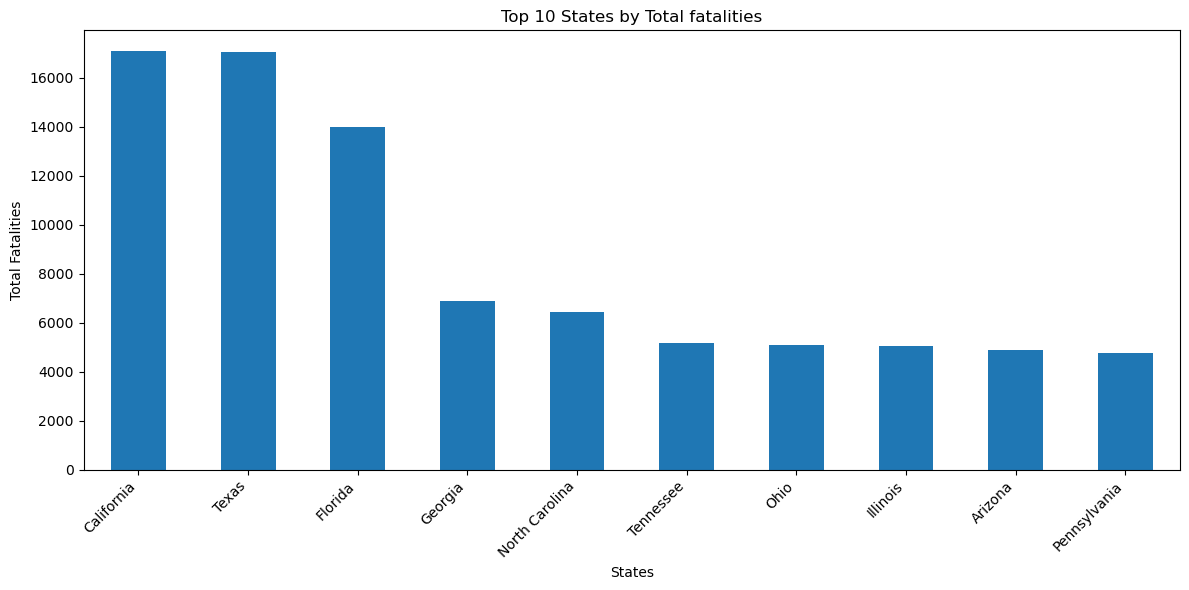

In [4]:
top_ten_states = accident_dfs.groupby("STATENAME")['FATALS'].sum().sort_values(ascending=False).head(10)
# print(top_ten_states)
plt.figure(figsize=(12,6))
top_ten_states.plot(kind="bar")
plt.title("Top 10 States by Total fatalities")
plt.xlabel("States")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.savefig("../outputs/figures/top10_states.png")
plt.show()


## Trend of total fatalities across different months


/tmp/ipykernel_18573/2347146231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = fatalities_trend,x='MONTHNAME',y='FATALS',palette='YlOrRd')


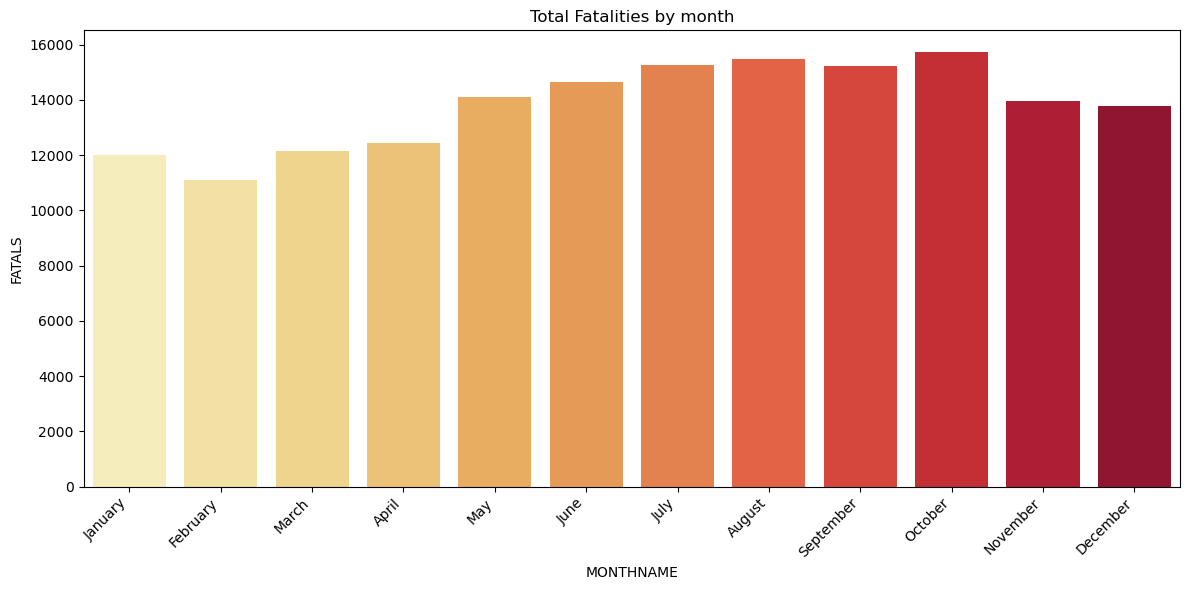

In [5]:
fatalities_trend = accident_dfs.groupby(['MONTH','MONTHNAME'])['FATALS'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = fatalities_trend,x='MONTHNAME',y='FATALS',palette='YlOrRd')
plt.xticks(rotation=45,ha="right")
plt.title("Total Fatalities by month")
plt.tight_layout()
plt.savefig("../outputs/figures/monthly_fatalities.png")
plt.show()

## Fatalities distribution each year

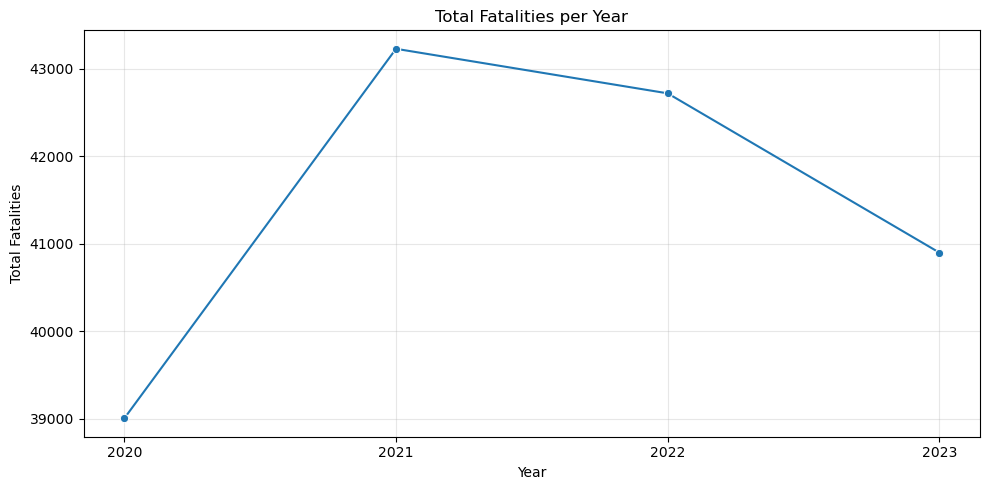

In [6]:
year_fatalities = accident_dfs.groupby('YEAR')["FATALS"].sum()
year_fatalities_index = year_fatalities.index
year_fatalities_values = year_fatalities.values
plt.figure(figsize=(10, 5))
sns.lineplot(x=year_fatalities_index, y=year_fatalities_values, marker="o")
plt.title("Total Fatalities per Year")
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.xticks(year_fatalities_index)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../outputs/figures/yearly_trend.png")
plt.show()


## Crash distribution by weather!!

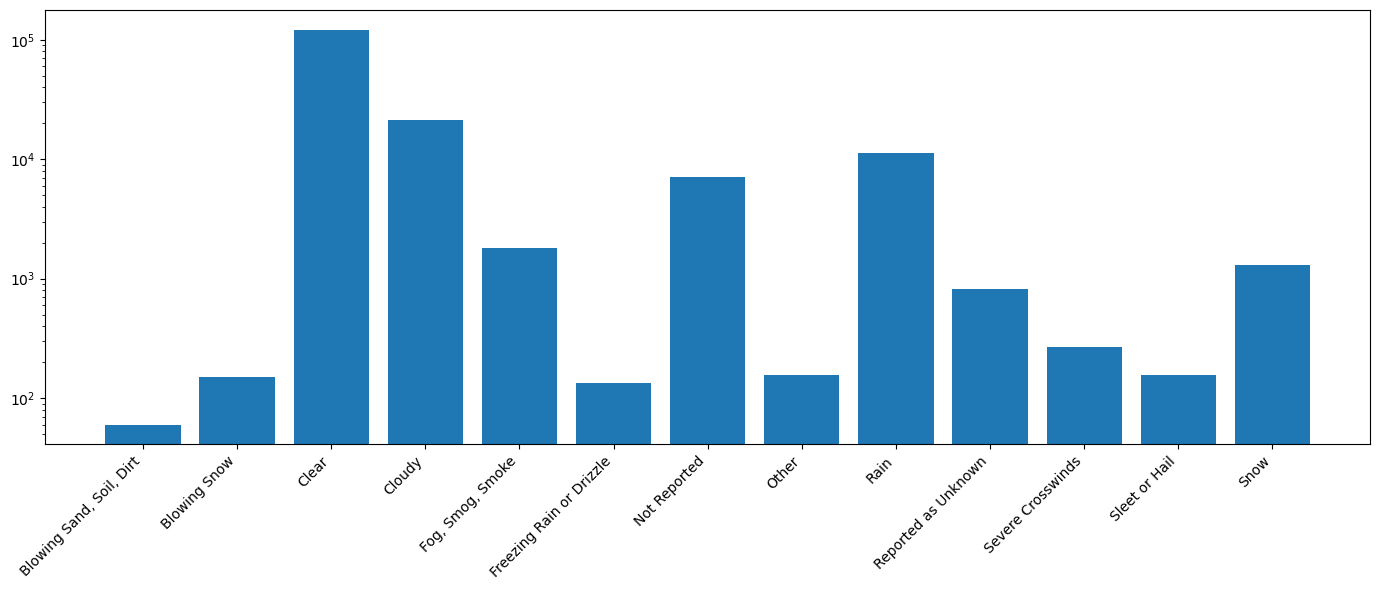

In [7]:
crash_distribution = accident_dfs.groupby("WEATHERNAME")['FATALS'].sum()
# print(crash_distribution)
weather_type = crash_distribution.index
fatalities = crash_distribution.values
# crash_distribution.plot(kind="bar")
plt.figure(figsize=(14,6))
plt.yscale("log")
plt.bar(weather_type,fatalities)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.savefig("../outputs/figures/weather_distribution.png")
plt.show()

## Deadliest hour of the day

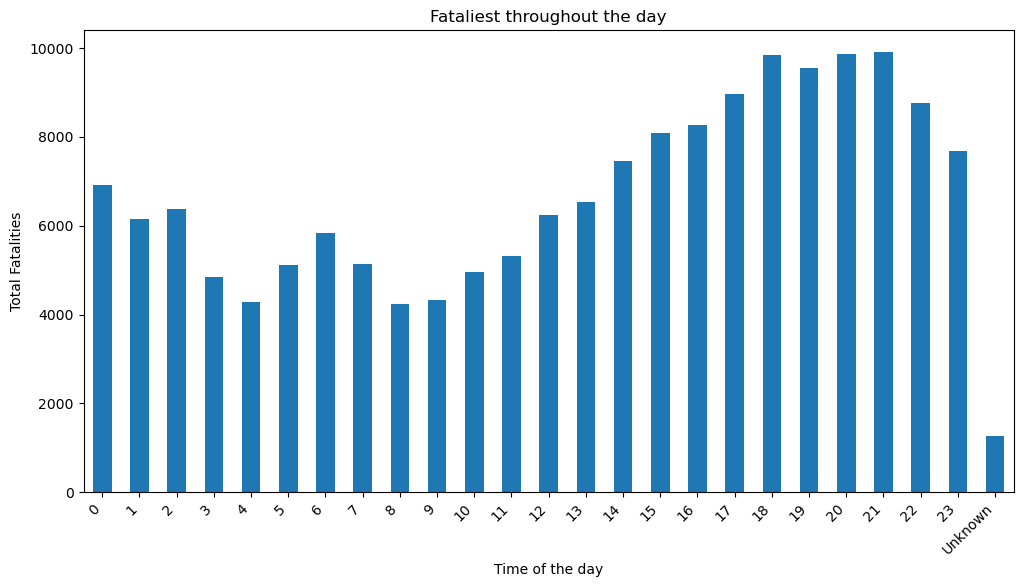

Deadliest hour:  21


In [8]:
# hour_distribution = (
#     accident_dfs.loc[accident_dfs["HOUR"].between(0,23)].groupby("HOUR")["FATALS"].sum()
#     )

# accident_dfs["HOUR"] = accident_dfs["HOUR"].replace(99,np.nan)
hour_distribution = accident_dfs.groupby("HOUR")["FATALS"].sum()
hour_distribution = hour_distribution.rename(index={99:"Unknown"})

plt.figure(figsize=(12,6))
hour_distribution.plot(kind="bar")

plt.xlabel("Time of the day")
plt.ylabel("Total Fatalities")
plt.title("Fataliest throughout the day")
plt.xticks(rotation=45,ha="right")
plt.savefig("../outputs/figures/hourly_distribution.png")
plt.show()
print("Deadliest hour: ", hour_distribution.idxmax())


## Creating hotspots

In [9]:
# print(accident_dfs["LATITUDE"].value_counts().head(20))  #Latitude is vertical(from north to south)
# print(accident_dfs.columns)
# print()
# print(accident_dfs["LONGITUD"].value_counts().head(20))
import folium
from folium.plugins import HeatMap

coords = accident_dfs[['LATITUDE','LONGITUD']].dropna()
#Create a map centered around US
m = folium.Map(location=[39.8283,-98.5795],zoom_start=5)
# Add Hotspots

HeatMap(
    coords.values.tolist(),
    radius = 8,
    blur = 10,
    max_zoom =1
).add_to(m)
m
m.save("../outputs/map/crash_hotspot.html")


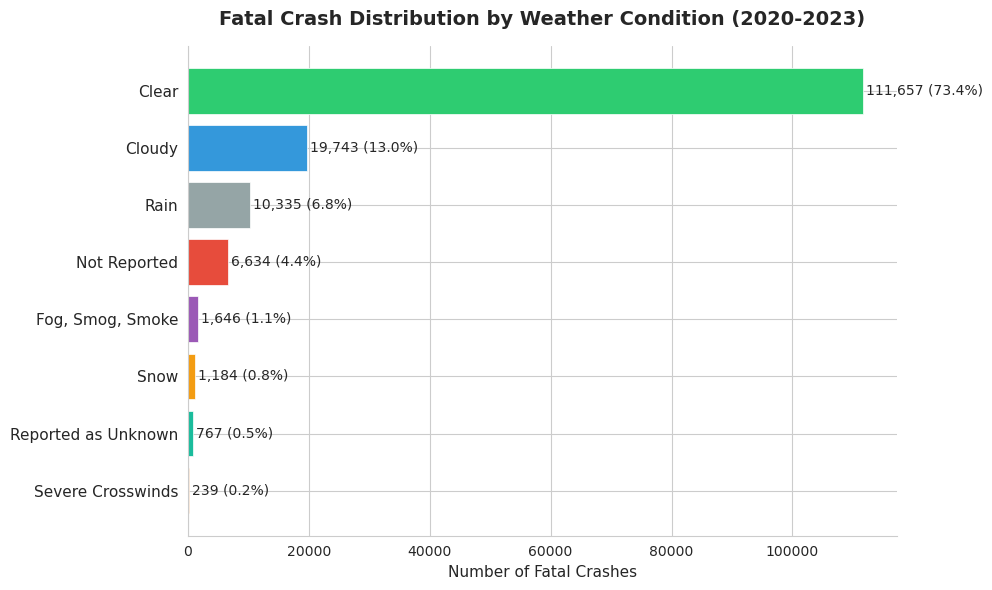

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get weather distribution
weather_counts = accident_dfs['WEATHERNAME'].value_counts().head(8)

# Set style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Create horizontal bar chart
colors = ['#2ecc71', '#3498db', '#95a5a6', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22']
bars = ax.barh(weather_counts.index[::-1], weather_counts.values[::-1], color=colors[::-1], edgecolor='white', linewidth=0.5)

# Add count labels on each bar
for bar, val in zip(bars, weather_counts.values[::-1]):
    pct = val / weather_counts.sum() * 100
    ax.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2,
            f'{val:,} ({pct:.1f}%)', va='center', fontsize=10, fontweight='500')

ax.set_title('Fatal Crash Distribution by Weather Condition (2020-2023)', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Number of Fatal Crashes', fontsize=11)
ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=11)

# Clean up
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('../outputs/figures/weather_distribution.png', dpi=300, bbox_inches='tight')
plt.show()